## 股价逆势上涨统计分析

### 获取50支股票信息

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

In [4]:
df = pd.read_csv('./all_data.csv')
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,code
0,0,2020-11-05,55.000000,62.150002,51.000000,51.029999,47.681602,21472552.0,300905.SZ
1,1,2020-11-06,47.005001,51.520000,46.505001,48.599998,45.411049,13282442.0,300905.SZ
2,2,2020-11-09,48.500000,49.845001,47.119999,48.740002,45.541870,11263252.0,300905.SZ
3,3,2020-11-10,48.000000,49.439999,47.000000,47.250000,44.149632,8399338.0,300905.SZ
4,4,2020-11-11,46.900002,49.055000,46.595001,47.700001,44.570107,8407878.0,300905.SZ
...,...,...,...,...,...,...,...,...,...
195256,195256,2024-08-26,10.470000,11.520000,10.420000,11.520000,11.520000,10574100.0,600506.SS
195257,195257,2024-08-27,11.500000,11.770000,11.220000,11.280000,11.280000,13423101.0,600506.SS
195258,195258,2024-08-28,11.380000,12.300000,11.210000,11.600000,11.600000,13100100.0,600506.SS
195259,195259,2024-08-29,11.530000,11.680000,11.160000,11.350000,11.350000,9205800.0,600506.SS


In [5]:
# 过滤掉code列中以'300'、'688'、‘8’开头的股票
df = df[~df['code'].str.startswith('300')]
df = df[~df['code'].str.startswith('688')]
df = df[~df['code'].str.startswith('8')]
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,code
11834,11834,2015-01-05,7.440,7.490,7.290,7.385,7.192119,12799906.0,000566.SZ
11835,11835,2015-01-06,7.390,7.710,7.365,7.595,7.396634,14522622.0,000566.SZ
11836,11836,2015-01-07,7.645,8.050,7.645,7.755,7.552455,24060822.0,000566.SZ
11837,11837,2015-01-08,7.800,7.885,7.605,7.705,7.503761,10945550.0,000566.SZ
11838,11838,2015-01-09,7.845,8.090,7.845,7.945,7.737493,25795612.0,000566.SZ
...,...,...,...,...,...,...,...,...,...
195256,195256,2024-08-26,10.470,11.520,10.420,11.520,11.520000,10574100.0,600506.SS
195257,195257,2024-08-27,11.500,11.770,11.220,11.280,11.280000,13423101.0,600506.SS
195258,195258,2024-08-28,11.380,12.300,11.210,11.600,11.600000,13100100.0,600506.SS
195259,195259,2024-08-29,11.530,11.680,11.160,11.350,11.350000,9205800.0,600506.SS


### 获取上证指数

In [6]:
df_szzs = pd.read_csv('000001.csv')
df_szzs.set_index('code', inplace=True)
# 计算每只股票的当日涨幅
df_szzs['Pct_Chg_szzs'] = df_szzs.groupby(level=0)['Close'].pct_change()
# 将涨幅数据转换为百分比形式
df_szzs['Pct_Chg_szzs'] *= 100
# 去除Pct_Chg为空的值
df_szzs = df_szzs.dropna(subset=['Pct_Chg_szzs'])

df_szzs

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg_szzs
code,,,,,,,,
000001.SS,2015-01-06,3330.799072,3394.224121,3303.184082,3351.446045,3351.446045,501700,0.027667
000001.SS,2015-01-07,3326.648926,3374.895996,3312.210938,3373.954102,3373.954102,391900,0.671592
000001.SS,2015-01-08,3371.957031,3381.565918,3285.094971,3293.456055,3293.456055,371100,-2.385867
000001.SS,2015-01-09,3276.965088,3404.833984,3267.509033,3285.412109,3285.412109,410200,-0.244240
000001.SS,2015-01-12,3258.212891,3275.185059,3191.582031,3229.315918,3229.315918,322100,-1.707432
...,...,...,...,...,...,...,...,...
000001.SS,2024-08-26,2855.474121,2860.655029,2844.383057,2855.520020,2855.520020,227400,0.040363
000001.SS,2024-08-27,2850.876953,2853.780029,2843.157959,2848.730957,2848.730957,230700,-0.237752
000001.SS,2024-08-28,2844.326904,2852.562012,2830.961914,2837.428955,2837.428955,228700,-0.396738


### 计算股票当日、3日、5日、10日、20日涨幅

In [7]:
df.set_index('code', inplace=True)
# 计算每只股票的当日涨幅
df['Pct_Chg'] = df.groupby(level=0)['Close'].pct_change()
# 计算3天后涨幅
df['Pct_Chg_3d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-3) /x ) - 1) * 100
# 计算5天后涨幅
df['Pct_Chg_5d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-5) /x ) - 1) * 100
# 计算10天后涨幅
df['Pct_Chg_10d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-10) /x ) - 1) * 100
# 计算20天后涨幅
df['Pct_Chg_20d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-20) /x ) - 1) * 100
# 将涨幅数据转换为百分比形式
df['Pct_Chg'] *= 100
# 去除Pct_Chg为空的值
df = df.dropna(subset=['Pct_Chg','Pct_Chg_3d_later', 'Pct_Chg_5d_later', 'Pct_Chg_10d_later', 'Pct_Chg_20d_later'])
df

C:\Users\PC\AppData\Local\Temp\ipykernel_15584\404313188.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Pct_Chg_3d_later'] = df.groupby(level=0)['Close'].apply(lambda x: (x.shift(-3) /x ) - 1) * 100
C:\Users\PC\AppData\Local\Temp\ipykernel_15584\404313188.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(...

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later
code,,,,,,,,,,,,,
000566.SZ,11835,2015-01-06,7.390,7.710,7.365,7.595,7.396634,14522622.0,2.843596,4.608300,3.620805,12.113240,25.082294
000566.SZ,11836,2015-01-07,7.645,8.050,7.645,7.755,7.552455,24060822.0,2.106653,3.997414,1.353965,15.473885,23.146358
000566.SZ,11837,2015-01-08,7.800,7.885,7.605,7.705,7.503761,10945550.0,-0.644748,2.141466,1.557429,15.963667,22.777419
000566.SZ,11838,2015-01-09,7.845,8.090,7.845,7.945,7.737493,25795612.0,3.114864,-1.069856,-1.699185,10.195090,14.222777
000566.SZ,11839,2015-01-12,7.945,8.100,7.730,8.065,7.854358,17574292.0,1.510376,-2.975819,-2.665836,13.329210,14.631127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600506.SS,195236,2024-07-29,11.430,11.500,11.350,11.350,11.350000,2449200.0,-0.699912,3.436118,-1.762121,0.704845,1.497798
600506.SS,195237,2024-07-30,11.270,11.490,11.270,11.450,11.450000,2781163.0,0.881052,1.048034,-0.786028,-0.087338,-1.484717
600506.SS,195238,2024-07-31,11.450,11.720,11.400,11.680,11.680000,4159681.0,2.008738,-4.537677,-2.654113,-5.051371,-0.684931


### 合并个股和上证指数

In [8]:
# 重置索引，以便合并
df = df.reset_index()
df_szzs = df_szzs.reset_index()
# 合并两个DataFrame
# 这里我们按照'Date'列进行合并，并且使用左连接，这样只会保留df中的日期
df = df.merge(df_szzs[['Date', 'Pct_Chg_szzs']], on='Date', how='left')
df

,code,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later,Pct_Chg_szzs
0,000566.SZ,11835,2015-01-06,7.390,7.710,7.365,7.595,7.396634,14522622.0,2.843596,4.608300,3.620805,12.113240,25.082294,0.027667
1,000566.SZ,11836,2015-01-07,7.645,8.050,7.645,7.755,7.552455,24060822.0,2.106653,3.997414,1.353965,15.473885,23.146358,0.671592
2,000566.SZ,11837,2015-01-08,7.800,7.885,7.605,7.705,7.503761,10945550.0,-0.644748,2.141466,1.557429,15.963667,22.777419,-2.385867
3,000566.SZ,11838,2015-01-09,7.845,8.090,7.845,7.945,7.737493,25795612.0,3.114864,-1.069856,-1.699185,10.195090,14.222777,-0.244240
4,000566.SZ,11839,2015-01-12,7.945,8.100,7.730,8.065,7.854358,17574292.0,1.510376,-2.975819,-2.665836,13.329210,14.631127,-1.707432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157314,600506.SS,195236,2024-07-29,11.430,11.500,11.350,11.350,11.350000,2449200.0,-0.699912,3.436118,-1.762121,0.704845,1.497798,0.032793
157315,600506.SS,195237,2024-07-30,11.270,11.490,11.270,11.450,11.450000,2781163.0,0.881052,1.048034,-0.786028,-0.087338,-1.484717,-0.433803
157316,600506.SS,195238,2024-07-31,11.450,11.720,11.400,11.680,11.680000,4159681.0,2.008738,-4.537677,-2.654113,-5.051371,-0.684931,2.064702
157317,600506.SS,195239,2024-08-01,11.690,11.890,11.680,11.740,11.740000,3969200.0,0.513694,-3.236798,-2.555368,-4.770013,-3.321971,-0.216489


### 区分大盘涨幅和个股涨幅

In [9]:
# 添加大盘涨跌情况的列
df['Market_Trend'] = np.where(df['Pct_Chg_szzs'] > 0, 'Up', 'Down')

In [10]:
# 大盘上涨时的数据
up_market = df[df['Market_Trend'] == 'Up']

# 大盘下跌时的数据
down_market = df[df['Market_Trend'] == 'Down']

# 顺势上涨的股票
up_market_inverse_rise = up_market[up_market['Pct_Chg'] > 0]
# 逆势上涨的股票
down_market_inverse_rise = down_market[down_market['Pct_Chg'] > 0]

# 顺势涨停的股票
up_market_limit_up = up_market[up_market['Pct_Chg'] >= 9.8]
# 逆势涨停的股票
down_market_limit_up = down_market[down_market['Pct_Chg'] >= 9.8]

In [11]:
# 计算平均收益率
def average_returns(df, days):
    return df[f'Pct_Chg_{days}d_later'].mean()

In [12]:
# 大盘上涨时的顺势上涨股票收益
up_market_inverse_rise_avg_3d = average_returns(up_market_inverse_rise, 3)
up_market_inverse_rise_avg_5d = average_returns(up_market_inverse_rise, 5)
up_market_inverse_rise_avg_10d = average_returns(up_market_inverse_rise, 10)
up_market_inverse_rise_avg_20d = average_returns(up_market_inverse_rise, 20)

# 大盘下跌时的逆势上涨股票收益
down_market_inverse_rise_avg_3d = average_returns(down_market_inverse_rise, 3)
down_market_inverse_rise_avg_5d = average_returns(down_market_inverse_rise, 5)
down_market_inverse_rise_avg_10d = average_returns(down_market_inverse_rise, 10)
down_market_inverse_rise_avg_20d = average_returns(down_market_inverse_rise, 20)

# 大盘上涨时的涨停股票收益
up_market_limit_up_avg_3d = average_returns(up_market_limit_up, 3)
up_market_limit_up_avg_5d = average_returns(up_market_limit_up, 5)
up_market_limit_up_avg_10d = average_returns(up_market_limit_up, 10)
up_market_limit_up_avg_20d = average_returns(up_market_limit_up, 20)

# 大盘下跌时的涨停股票收益
down_market_limit_up_avg_3d = average_returns(down_market_limit_up, 3)
down_market_limit_up_avg_5d = average_returns(down_market_limit_up, 5)
down_market_limit_up_avg_10d = average_returns(down_market_limit_up, 10)
down_market_limit_up_avg_20d = average_returns(down_market_limit_up, 20)

#### 2015-01-01 到 2024-08-30 的数据，共158978条

In [13]:
print(f"大盘上涨时逆势上涨股票在未来3天的平均收益率: {up_market_inverse_rise_avg_3d}")
print(f"大盘下跌时逆势上涨股票在未来3天的平均收益率: {down_market_inverse_rise_avg_3d}")
print(f"大盘上涨时逆势涨停股票在未来3天的平均收益率: {up_market_limit_up_avg_3d}")
print(f"大盘下跌时逆势涨停股票在未来3天的平均收益率: {down_market_limit_up_avg_3d}")

print(f"大盘上涨时逆势上涨股票在未来5天的平均收益率: {up_market_inverse_rise_avg_5d}")
print(f"大盘下跌时逆势上涨股票在未来5天的平均收益率: {down_market_inverse_rise_avg_5d}")
print(f"大盘上涨时逆势涨停股票在未来5天的平均收益率: {up_market_limit_up_avg_5d}")
print(f"大盘下跌时逆势涨停股票在未来5天的平均收益率: {down_market_limit_up_avg_5d}")

print(f"大盘上涨时逆势上涨股票在未来10天的平均收益率: {up_market_inverse_rise_avg_10d}")
print(f"大盘下跌时逆势上涨股票在未来10天的平均收益率: {down_market_inverse_rise_avg_10d}")
print(f"大盘上涨时逆势涨停股票在未来10天的平均收益率: {up_market_limit_up_avg_10d}")
print(f"大盘下跌时逆势涨停股票在未来10天的平均收益率: {down_market_limit_up_avg_10d}")

print(f"大盘上涨时逆势上涨股票在未来20天的平均收益率: {up_market_inverse_rise_avg_20d}")
print(f"大盘下跌时逆势上涨股票在未来20天的平均收益率: {down_market_inverse_rise_avg_20d}")
print(f"大盘上涨时逆势涨停股票在未来20天的平均收益率: {up_market_limit_up_avg_20d}")
print(f"大盘下跌时逆势涨停股票在未来20天的平均收益率: {down_market_limit_up_avg_20d}")

大盘上涨时逆势上涨股票在未来3天的平均收益率: 0.3993642102744771
大盘下跌时逆势上涨股票在未来3天的平均收益率: 0.06740350853591012
大盘上涨时逆势涨停股票在未来3天的平均收益率: 3.8101036222538647
大盘下跌时逆势涨停股票在未来3天的平均收益率: 3.1563829413675175
大盘上涨时逆势上涨股票在未来5天的平均收益率: 0.44643637223597016
大盘下跌时逆势上涨股票在未来5天的平均收益率: 0.1218807047650513
大盘上涨时逆势涨停股票在未来5天的平均收益率: 4.567753972316395
大盘下跌时逆势涨停股票在未来5天的平均收益率: 3.9599496819131614
大盘上涨时逆势上涨股票在未来10天的平均收益率: 0.578303630214755
大盘下跌时逆势上涨股票在未来10天的平均收益率: 0.19879423663704057
大盘上涨时逆势涨停股票在未来10天的平均收益率: 5.248581445271468
大盘下跌时逆势涨停股票在未来10天的平均收益率: 4.403116190213673
大盘上涨时逆势上涨股票在未来20天的平均收益率: 1.0531392120597525
大盘下跌时逆势上涨股票在未来20天的平均收益率: -0.18426617926925973
大盘上涨时逆势涨停股票在未来20天的平均收益率: 4.61631063415138
大盘下跌时逆势涨停股票在未来20天的平均收益率: 2.987605961693198


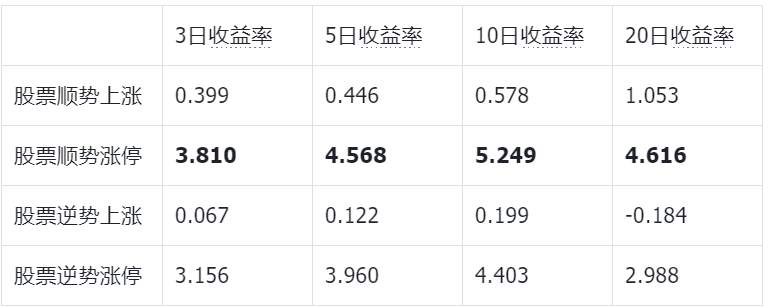

#### 2023-01-01 到 2024-08-30 的数据，共30185条

In [14]:
# 确保日期列是日期类型
df['Date'] = pd.to_datetime(df['Date'])
# 筛选出2023年1月1日之后的数据
df = df[df['Date'] > '2023-01-01']
df

,code,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Chg,Pct_Chg_3d_later,Pct_Chg_5d_later,Pct_Chg_10d_later,Pct_Chg_20d_later,Pct_Chg_szzs,Market_Trend
1698,000566.SZ,13533,2023-01-03,4.28,4.40,4.28,4.36,4.36,14176404.0,2.107732,-2.981654,-2.981654,-2.752302,2.981643,0.882088,Up
1699,000566.SZ,13534,2023-01-04,4.36,4.37,4.28,4.33,4.33,14264012.0,-0.688078,-2.771360,-2.771360,-1.154728,3.464205,0.224931,Up
1700,000566.SZ,13535,2023-01-05,4.34,4.34,4.24,4.29,4.29,12127097.0,-0.923787,-1.398600,-2.331000,0.466200,5.361306,1.014879,Up
1701,000566.SZ,13536,2023-01-06,4.30,4.30,4.20,4.23,4.23,14352335.0,-1.398600,-0.472813,0.236401,2.836877,7.801417,0.076696,Up
1702,000566.SZ,13537,2023-01-09,4.23,4.26,4.21,4.21,4.21,11902101.0,-0.472813,-0.475059,2.375295,3.325412,9.738714,0.583986,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157314,600506.SS,195236,2024-07-29,11.43,11.50,11.35,11.35,11.35,2449200.0,-0.699912,3.436118,-1.762121,0.704845,1.497798,0.032793,Up
157315,600506.SS,195237,2024-07-30,11.27,11.49,11.27,11.45,11.45,2781163.0,0.881052,1.048034,-0.786028,-0.087338,-1.484717,-0.433803,Down
157316,600506.SS,195238,2024-07-31,11.45,11.72,11.40,11.68,11.68,4159681.0,2.008738,-4.537677,-2.654113,-5.051371,-0.684931,2.064702,Up
157317,600506.SS,195239,2024-08-01,11.69,11.89,11.68,11.74,11.74,3969200.0,0.513694,-3.236798,-2.555368,-4.770013,-3.321971,-0.216489,Down


In [15]:
# 大盘上涨时的数据
up_market = df[df['Market_Trend'] == 'Up']

# 大盘下跌时的数据
down_market = df[df['Market_Trend'] == 'Down']

# 逆势上涨的股票
up_market_inverse_rise = up_market[up_market['Pct_Chg'] > 0]
down_market_inverse_rise = down_market[down_market['Pct_Chg'] > 0]

# 逆势涨停的股票
up_market_limit_up = up_market[up_market['Pct_Chg'] >= 9.8]
down_market_limit_up = down_market[down_market['Pct_Chg'] >= 9.8]

In [16]:
# 大盘上涨时的顺势上涨股票收益
up_market_inverse_rise_avg_3d = average_returns(up_market_inverse_rise, 3)
up_market_inverse_rise_avg_5d = average_returns(up_market_inverse_rise, 5)
up_market_inverse_rise_avg_10d = average_returns(up_market_inverse_rise, 10)
up_market_inverse_rise_avg_20d = average_returns(up_market_inverse_rise, 20)

# 大盘下跌时的逆势上涨股票收益
down_market_inverse_rise_avg_3d = average_returns(down_market_inverse_rise, 3)
down_market_inverse_rise_avg_5d = average_returns(down_market_inverse_rise, 5)
down_market_inverse_rise_avg_10d = average_returns(down_market_inverse_rise, 10)
down_market_inverse_rise_avg_20d = average_returns(down_market_inverse_rise, 20)

# 大盘上涨时的涨停股票收益
up_market_limit_up_avg_3d = average_returns(up_market_limit_up, 3)
up_market_limit_up_avg_5d = average_returns(up_market_limit_up, 5)
up_market_limit_up_avg_10d = average_returns(up_market_limit_up, 10)
up_market_limit_up_avg_20d = average_returns(up_market_limit_up, 20)

# 大盘下跌时的涨停股票收益
down_market_limit_up_avg_3d = average_returns(down_market_limit_up, 3)
down_market_limit_up_avg_5d = average_returns(down_market_limit_up, 5)
down_market_limit_up_avg_10d = average_returns(down_market_limit_up, 10)
down_market_limit_up_avg_20d = average_returns(down_market_limit_up, 20)

In [17]:
print(f"大盘上涨时顺势上涨股票在未来3天的平均收益率: {up_market_inverse_rise_avg_3d}")
print(f"大盘下跌时逆势上涨股票在未来3天的平均收益率: {down_market_inverse_rise_avg_3d}")
print(f"大盘上涨时顺势涨停股票在未来3天的平均收益率: {up_market_limit_up_avg_3d}")
print(f"大盘下跌时逆势涨停股票在未来3天的平均收益率: {down_market_limit_up_avg_3d}")

大盘上涨时顺势上涨股票在未来3天的平均收益率: 0.5537190402499911
大盘下跌时逆势上涨股票在未来3天的平均收益率: -0.08026751965140076
大盘上涨时顺势涨停股票在未来3天的平均收益率: 3.5204025121922835
大盘下跌时逆势涨停股票在未来3天的平均收益率: 2.1079661481889365


In [18]:
print(f"大盘上涨时逆势上涨股票在未来5天的平均收益率: {up_market_inverse_rise_avg_5d}")
print(f"大盘下跌时逆势上涨股票在未来5天的平均收益率: {down_market_inverse_rise_avg_5d}")
print(f"大盘上涨时逆势涨停股票在未来5天的平均收益率: {up_market_limit_up_avg_5d}")
print(f"大盘下跌时逆势涨停股票在未来5天的平均收益率: {down_market_limit_up_avg_5d}")

大盘上涨时逆势上涨股票在未来5天的平均收益率: 0.25621537494088553
大盘下跌时逆势上涨股票在未来5天的平均收益率: 0.08520593715039326
大盘上涨时逆势涨停股票在未来5天的平均收益率: 3.212897427986145
大盘下跌时逆势涨停股票在未来5天的平均收益率: 1.1988571715686749


In [19]:
print(f"大盘上涨时逆势上涨股票在未来10天的平均收益率: {up_market_inverse_rise_avg_10d}")
print(f"大盘下跌时逆势上涨股票在未来10天的平均收益率: {down_market_inverse_rise_avg_10d}")
print(f"大盘上涨时逆势涨停股票在未来10天的平均收益率: {up_market_limit_up_avg_10d}")
print(f"大盘下跌时逆势涨停股票在未来10天的平均收益率: {down_market_limit_up_avg_10d}")

大盘上涨时逆势上涨股票在未来10天的平均收益率: 0.06524006694133186
大盘下跌时逆势上涨股票在未来10天的平均收益率: -0.21137523118757617
大盘上涨时逆势涨停股票在未来10天的平均收益率: 3.3920407561018067
大盘下跌时逆势涨停股票在未来10天的平均收益率: -0.21081764043535378


In [20]:
print(f"大盘上涨时逆势上涨股票在未来20天的平均收益率: {up_market_inverse_rise_avg_20d}")
print(f"大盘下跌时逆势上涨股票在未来20天的平均收益率: {down_market_inverse_rise_avg_20d}")
print(f"大盘上涨时逆势涨停股票在未来20天的平均收益率: {up_market_limit_up_avg_20d}")
print(f"大盘下跌时逆势涨停股票在未来20天的平均收益率: {down_market_limit_up_avg_20d}")

大盘上涨时逆势上涨股票在未来20天的平均收益率: 0.23609848568351421
大盘下跌时逆势上涨股票在未来20天的平均收益率: -0.7289792976183664
大盘上涨时逆势涨停股票在未来20天的平均收益率: 2.0306463939797488
大盘下跌时逆势涨停股票在未来20天的平均收益率: -2.474049930082397


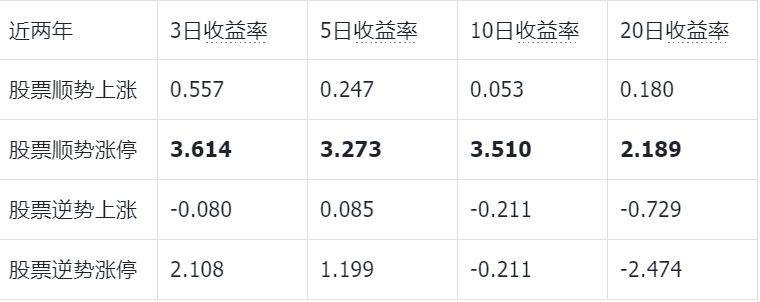

#### 一、涨停股票短期内收益明显高于非涨停股票，具有较强的短期收益波动性


#### 二、非涨停股票的收益在大盘下跌时受到较大影响，尤其是逆势上涨的股票表现非常不理想。